In [14]:
import numpy as np
import cv2
from matplotlib import pyplot as plt


In [2]:
# Function chay qua lau, code function moi

def cross_corr(img, mask):
    max_row    = img.shape[0] - mask.shape[0] + 1
    max_col    = img.shape[1] - mask.shape[1] + 1

    output = np.zeros([max_row, max_col])

    for curr_row in range(0, max_row):
        for curr_col in range(0, max_col):
            for curr_mask_row in range(0, mask.shape[0]):
                for curr_mask_col in range(0, mask.shape[1]):
                    output[curr_row, curr_col] += img[curr_row + curr_mask_row, curr_col + curr_mask_col] * mask[curr_mask_row, curr_mask_col]
                    
    return output;                
    

In [19]:
def cross_correlate2d(image, kernel):
    m, n = kernel.shape
    
    y, x = image.shape
    y = y - m + 1
    x = x - m + 1
    new_image = np.zeros((y,x))
    for i in range(y):
        for j in range(x):
                new_image[i][j] = np.sum(image[i:i+m, j:j+n]*kernel)
    return new_image

In [20]:
# read img
image = cv2.imread('9-ro.jpeg')
template = cv2.imread('template.png')


In [17]:
# convert rgb img into grayscale img to process
img_gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
template_gray= cv2.cvtColor(template, cv2.COLOR_RGB2GRAY)

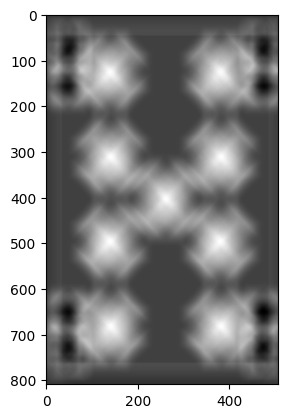

In [22]:
#find cross correlate of 2 img
res = cross_correlate2d(img_gray, template_gray)

plt.imshow(res, cmap='gray')
plt.show()

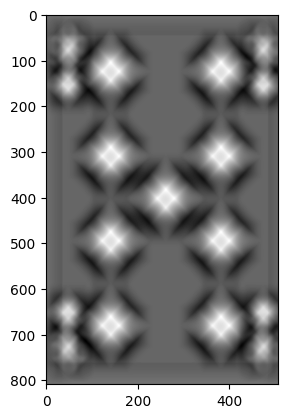

In [24]:
#normalize 
img_gray = img_gray  - img_gray.mean()
template_gray = template_gray  - template_gray.mean()

#find cross correlate of 2 img
res = cross_correlate2d(img_gray, template_gray)

plt.imshow(res, cmap='gray')
plt.show()

In [25]:
#function find position of the matching template and draw rectangle
def template_matching_ncc(src, temp):
    h, w = src.shape
    ht, wt = temp.shape

    score = np.empty((h-ht, w-wt))

    src = np.array(src, dtype="float")
    temp = np.array(temp, dtype="float")

    for dy in range(0, h - ht):
        for dx in range(0, w - wt):
            roi = src[dy:dy + ht, dx:dx + wt]
            
            num = np.sum(roi * temp)
            den = np.sqrt((np.sum(roi ** 2))) * np.sqrt(np.sum(temp ** 2))
            if den == 0:
                score[dy, dx] = 0
            score[dy, dx] = num / den

    pt = np.unravel_index(score.argmax(), score.shape)

    return (pt[1], pt[0])

In [26]:
h, w= template_gray.shape

pos = template_matching_ncc(img_gray, template_gray)

cv2.rectangle(image, (pos[0], pos[1]), (pos[0] + w, pos[1] + h), (0, 0, 200), 3)

cv2.imwrite("output.png", image)

True

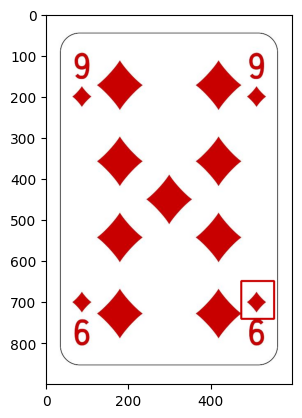

In [33]:
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()